# ELUSB温度ロガーのグラフ

In [9]:
import datetime
import glob
import pandas
from statistics import mean

def loadall(path):
    dates = {}
    for file in sorted(glob.glob(path)):
        if '_' in file:
            continue

        df = pandas.read_csv(file, encoding='sjis')
        for i, row in df.iterrows():
            d = datetime.datetime.strptime(row['Time'], '%d/%m/%Y %H:%M:%S')
            if d.year not in dates:
                dates[d.year] = {}
            if d.month not in dates[d.year]:
                dates[d.year][d.month] = {}
            if d.day not in dates[d.year][d.month]:
                dates[d.year][d.month][d.day] = []
            dates[d.year][d.month][d.day].append(row['Celsius(ｰC)'])
        #break
    return dates

def getdaycount(months, month):
    if month in months:
        return len(months[month])
    else:
        return ''

def getmean(months, month):
    if month in months:
        return mean([mean(months[month][d]) for d in months[month]])
    else:
        return None

## 阿智

In [11]:
dates = loadall('../../../Dropbox/private/ELUSB/achi/*/*')
pandas.DataFrame({'%d年'%year: [getdaycount(dates[year], month) for month in range(1, 13)] for year in dates}, index=['%d月'%i for i in range(1, 13)]).T

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月
2009年,,,,,,,,19,30,31,30,31
2010年,31,28,31,30,31,30,31,31,30,31,30,31
2011年,31,28,31,30,31,30,31,31,30,31,30,31
2012年,31,29,31,30,31,30,31,13,,,,
2013年,28,28,31,30,31,30,31,31,30,31,30,31
2014年,31,28,31,30,31,30,31,31,30,31,30,31
2015年,31,28,31,30,31,30,31,28,11,31,30,31
2016年,31,29,31,30,31,30,31,31,30,31,30,31
2017年,31,28,31,30,31,30,31,31,30,31,30,31
2018年,2,,,,,,,,,,,


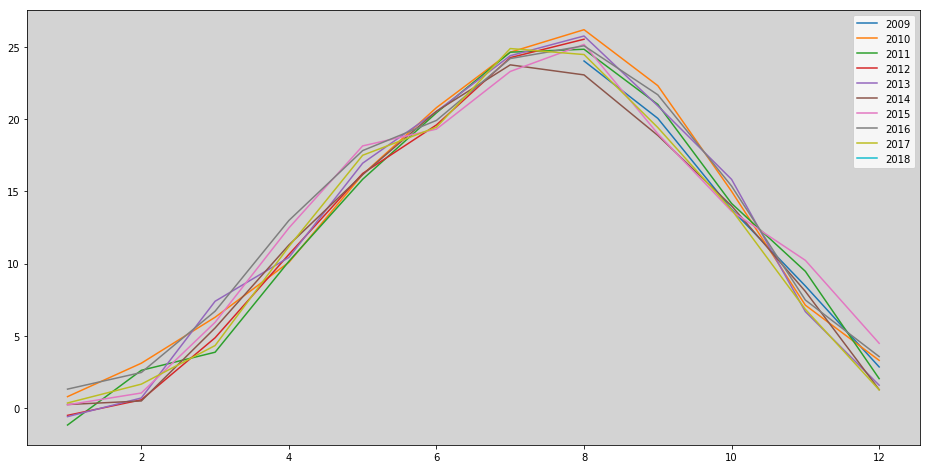

In [12]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 16,8

pandas.DataFrame({year: [getmean(dates[year], month) for month in range(1, 13)] for year in dates}, index=range(1, 13)).plot()
plt.gca().patch.set_facecolor('lightgray')
plt.show()

## 船橋

In [13]:
dates = loadall('../../../Dropbox/private/ELUSB/funabashi/*/*')
pandas.DataFrame({'%d年'%year: [getdaycount(dates[year], month) for month in range(1, 13)] for year in dates}, index=['%d月'%i for i in range(1, 13)]).T

,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月
2009年,,,,,,,,24,23,29,30,31
2010年,31,28,31,30,29,30,31,25,30,31,30,31
2011年,31,28,31,30,31,5,,11,30,31,30,31
2012年,26,25,31,30,31,9,10,3,,,,


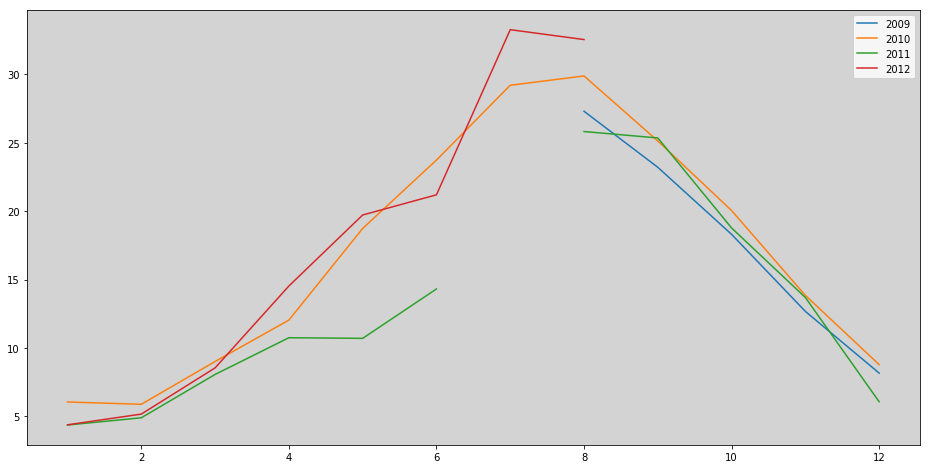

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 16,8

pandas.DataFrame({year: [getmean(dates[year], month) for month in range(1, 13)] for year in dates}, index=range(1, 13)).plot()
plt.gca().patch.set_facecolor('lightgray')
plt.show()